In [1]:
import numpy as np
from typing import *

In [117]:
a = [[1, 2, 3], [0, 4, 5], [1, 0, 6]]
a2 = [[1, 2, 3, 7], [.213, 4, 5, 34], [1, 2,5, -6846], [1, 496846, 6, 846]]

In [118]:
def mul(a, b: List[List]):
    return [[a * b[i][j] for j in range(len(b[i]))] for i in range(len(b))]

In [119]:
def determinant_2_2(a: List[List]):
    y = a[0][0]*a[1][1] - a[0][1]*a[1][0]
    return y

In [120]:
determinant_2_2([[1, 2], [3, 4]])

-2

In [121]:
def determinant_3_3(a: List[List]):
    ans = 0
    for i1 in range(3):
        z = a[0][i1]
        y = 0
        if i1 == 0:
            y = determinant_2_2(list(map(lambda x: x[1:], a[1:])))
        elif i1 == 1:
            y = -determinant_2_2(list(map(lambda x: x[0:3:2], a[1:])))
        elif i1 == 2:
            y = determinant_2_2(list(map(lambda x: x[:1+1], a[1:])))
        ans += y*z
    return ans

In [122]:
def transpose(a: List[List]) -> List[List]:
    b = [[0 for _ in range(len(a))] for __ in range(len(a[0]))]
    for i in range(len(a)):
        for j in range(len(a[i])):
            b[j][i] = a[i][j]
    return b

In [123]:
transpose(a)

[[1, 0, 1], [2, 4, 0], [3, 5, 6]]

In [9]:
def determinant_any_sq(a: List[List]) -> List[List]:
    if len(a) == 1:
        return a[0][0]
    elif len(a) == 2:
        return determinant_2_2(a)
    else:
        ans = 0
        for j1 in range(len(a)):
            to_det_i_range = list(set(range(0, len(a))) - {0})
            to_det_j_range = list(set(range(0, len(a[0]))) - {j1})
            z = a[0][j1]
            to_det = [[a[ii][jj] for jj in to_det_j_range] for ii in to_det_i_range]
            det = determinant_any_sq(to_det)
            if j1 % 2 == 1:
                det *= -1
            ans += det*z
        return ans

In [10]:
def inv(a: List[List]) -> List[List]:
    b = [[0 for _ in range(len(a[0]))] for __ in range(len(a))]
    for i in range(len(a)):
        for j in range(len(a[i])):
            to_det_i_range = list(set(range(0, len(a))) - {i})
            to_det_j_range = list(set(range(0, len(a[i]))) - {j})
            to_det_i_range.sort();to_det_j_range.sort()
            to_det = [[a[ii][jj] for jj in to_det_j_range] for ii in to_det_i_range]
            det = determinant_any_sq(to_det)
            if (i % 2 == 1) ^ (j % 2 == 1):
                det*=-1
            b[i][j] = det
    return mul(1.0/determinant_any_sq(a), transpose(b))

In [11]:
i = 2
j = 1
(i == 1) ^ (j == 1)

True

In [136]:
%time determinant_any_sq(a2)

CPU times: user 127 µs, sys: 51 µs, total: 178 µs
Wall time: 187 µs


-14880870823.606

In [137]:
%time np.linalg.det(a2)

CPU times: user 121 µs, sys: 0 ns, total: 121 µs
Wall time: 128 µs


-14880870823.606

In [17]:
determinant_3_3(a)

22

In [18]:
np.linalg.det(np.array(a))

22.000000000000004

In [25]:
list(map(lambda x: x[1:], a[:1+1]))

[[0, 2], [-1, 1]]

In [33]:
list(map(lambda x: x[0:3:2], a[1:]))

[[2, 1], [1, -1]]

In [35]:
list(map(lambda x: x[:1+1], a[1:]))

[[2, -1], [1, 3]]

In [24]:
np.array(inv(a2))

array([[ 1.14854362e+00, -6.86890388e-01, -2.23688186e-03,
         9.15672218e-07],
       [-1.93374584e-06, -1.49433459e-06,  2.39324166e-07,
         2.01271494e-06],
       [-4.98198083e-02,  2.28808648e-01,  1.08521223e-03,
        -1.64591322e-06],
       [ 1.31381932e-04,  6.67761996e-05, -1.45604783e-04,
        -4.80348233e-10]])

In [25]:
np.linalg.inv(np.array(a2))

array([[ 1.14854362e+00, -6.86890388e-01, -2.23688186e-03,
         9.15672218e-07],
       [-1.93374584e-06, -1.49433459e-06,  2.39324166e-07,
         2.01271494e-06],
       [-4.98198083e-02,  2.28808648e-01,  1.08521223e-03,
        -1.64591322e-06],
       [ 1.31381932e-04,  6.67761996e-05, -1.45604783e-04,
        -4.80348233e-10]])

In [149]:
%time determinant_any_sq(a2)*determinant_any_sq(inv(a2))

CPU times: user 690 µs, sys: 299 µs, total: 989 µs
Wall time: 1 ms


0.9999999999999998

In [150]:
%time np.linalg.det(np.array(a2))*np.linalg.det(np.linalg.inv(np.array(a2)))

CPU times: user 873 µs, sys: 0 ns, total: 873 µs
Wall time: 392 µs


1.0

In [47]:
np.linalg.det(np.array(a))

12.000000000000005

In [48]:
np.linalg.det(np.linalg.inv(np.array(a)))

0.08333333333333329

In [49]:
determinant_3_3(np.linalg.inv(np.array(a)))

0.08333333333333331

In [50]:
np.linalg.det(list(map(lambda x: x[:1+1], a[1:])))

7.000000000000001

In [51]:
determinant_2_2(list(map(lambda x: x[:1+1], a[1:])))

7

In [15]:
import math

## Rotation 

In [254]:
def get_rotation_matrix_2(angle: float) -> np.array:
    b = [[] for _ in range(2)]
    b[0] = [math.cos(angle), math.sin(angle)]
    b[1] = [-math.sin(angle), math.cos(angle)]
    return np.array(b)

In [46]:
b = np.zeros((3, 3))

In [72]:
b[0, 0] = 2
b[2, 0] = 3
b[0, 2] = 4
b[2, 2] = 5

In [77]:
b[::2, ::2]

array([[2., 4.],
       [3., 5.]])

In [300]:
def get_rotation_matrix_3_x(angle: float) -> np.array:
    b = np.zeros((3, 3))
    b[0, 0] = 1
    b[1:3, 1:3] = get_rotation_matrix_2(angle)
    return b
def get_rotation_matrix_3_y(angle: float) -> np.array:
    b = np.zeros((3, 3))
    b[1, 1] = 1
    b[::-2, ::-2] = get_rotation_matrix_2(angle)
    return b
def get_rotation_matrix_3_z(angle: float) -> np.array:
    b = np.zeros((3, 3))
    b[2, 2] = 1
    b[0:2, 0:2] = get_rotation_matrix_2(angle)
    return b
def get_rotation_matrix_3_xyz(x: float, y:  float, z: float) -> np.array:
    return np.dot(np.dot(get_rotation_matrix_3_x(x), get_rotation_matrix_3_y(y)), get_rotation_matrix_3_z(z)) 

In [301]:
get_rotation_matrix_3_xyz(3, 3, 3)

array([[ 0.98008514, -0.13970775, -0.14112001],
       [ 0.11999219,  0.98289553, -0.13970775],
       [ 0.15822448,  0.11999219,  0.98008514]])

In [17]:
def dot(a: List[List], b: List[List]) -> List[List]:
    c = [[0 for j in range(len(b[0]))] for i in range(len(a))]
    for i in range(len(a)):
        for j in range(len(b[0])):
            for i2 in range(len(a[0])):
                c[i][j] += a[i][i2]*b[i2][j]
    return c
def add(a: List[List], b: List[List]):
    return [[a[i][ii] + b[i][ii] for ii in range(len(a[i]))] for i in range(len(a))]
def diff(a: List[List], b: List[List]):
    return [[a[i][ii] - b[i][ii] for ii in range(len(a[i]))] for i in range(len(a))]


def rotate_points(points, angle, origin_point):
    points_mat = transpose([[p[0]-origin_point[0], p[1]-origin_point[1]] for p in points])
    points_out = transpose(dot(get_rotation_matrix(angle), points_mat))
    print(np.array(points_out))
#     return [[p[0]+origin_point[0], p[1]+origin_point[1]] for p in points_out]



In [154]:
x = 3.14; y = 3.14; z = 3.14
points = np.array([[-0.9, 1.3, 0], [1.8, 2, -0.5], [2, 1.2, 0.5], [1, 3, 0.8]])
print(points)
print()
rot_mat = get_rotation_matrix_3_xyz(x, y, z)
rot_mat_inv = np.linalg.inv(rot_mat)
print(rot_mat);print(rot_mat_inv)

r = np.transpose(np.dot(rot_mat, np.transpose(points)))
print()
print(r)

np.round(np.transpose(np.dot(rot_mat_inv, np.transpose(r))), 5)

[[-0.9  1.3  0. ]
 [ 1.8  2.  -0.5]
 [ 2.   1.2  0.5]
 [ 1.   3.   0.8]]

[[-9.99998732e-01  0.00000000e+00  1.59265292e-03]
 [ 2.53654331e-06 -9.99998732e-01  1.59265090e-03]
 [ 1.59265090e-03  1.59265292e-03  9.99997463e-01]]
[[-9.99998732e-01  2.53654331e-06  1.59265090e-03]
 [ 8.47034022e-22 -9.99998732e-01  1.59265292e-03]
 [ 1.59265292e-03  1.59265090e-03  9.99997463e-01]]

[[ 8.99998859e-01 -1.30000063e+00  6.37062985e-04]
 [-1.80079404e+00 -2.00078922e+00 -4.93946654e-01]
 [-1.99920114e+00 -1.19919708e+00  5.05095217e-01]
 [-9.98724609e-01 -2.99871954e+00  8.06368580e-01]]


array([[-0.9,  1.3,  0. ],
       [ 1.8,  2. , -0.5],
       [ 2. ,  1.2,  0.5],
       [ 1. ,  3. ,  0.8]])

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

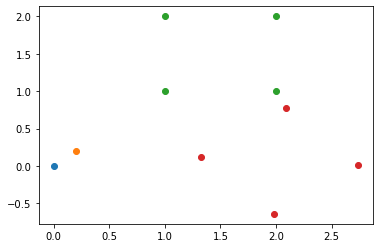

In [19]:
i = 0
rot_p = [0.2, 0.2]
plt.plot([0], [0], 'o')
plt.plot(rot_p[0], rot_p[1], 'o')
for i in [0, math.pi-4]:
    out = np.round(np.array(rotate_points([[1, 1], [1, 2], [2, 2], [2, 1]], i, rot_p)), 6)
    plt.plot(out[:, 0], out[:, 1], 'o')

In [229]:
def euclidean_to_homogeneous(p_e: np.array) -> np.array:
    if len(p_e.shape) > 1:
        if p_e.shape[1] == 1:
            return np.expand_dims(np.append(p_e, np.array([1])), 1)
        else:
            return np.array([np.append(p_e[0], 1)]).transpose()
    else:
        return np.append(p_e, 1)
def homogeneous_to_euclidean(p_h: np.array) -> np.array:
    return np.array(p_h[:-1]/p_h[-1][0])

In [250]:
def transform_3d_xyz(x: float, y: float, z: float) -> np.array:
    a = np.zeros((4, 4))
    a[0, 3] = x
    a[1, 3] = y
    a[2, 3] = z
    a[list(range(0, 4)), list(range(0, 4))] = 1
    return a
def transform_2d_xy(x: float, y: float) -> np.array:
    a = np.zeros((3, 3))
    a[0, 2] = x
    a[1, 2] = y
    a[list(range(0, 3)), list(range(0, 3))] = 1
    return a

In [251]:
transform_3d_xyz(2, 3, 4)
transform_2d_xy(2, 3)

array([[1., 0., 2.],
       [0., 1., 3.],
       [0., 0., 1.]])

In [289]:
def rotate_2d(angle: float):
    a = np.zeros((3, 3))
    a[0:2, 0:2] = get_rotation_matrix_2(angle)
    a[2, 2] = 1
    return a
def rotate_3d_xyz(x: float, y:  float, z: float):
    a = np.zeros((4, 4))
    a[0:3, 0:3] = get_rotation_matrix_3_xyz(x, y, z)
    a[3, 3] = 1
    return a

In [185]:
a = np.zeros((1, 2))
a, a.shape

(array([[0., 0.]]), (1, 2))

In [188]:
np.insert(a, (0, 1), 2)

array([2., 0., 2., 0.])

In [270]:
np.dot(transform_2d_xy(5, -6), rotate_2d(math.pi/2))

array([[ 6.123234e-17,  1.000000e+00,  5.000000e+00],
       [-1.000000e+00,  6.123234e-17, -6.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [284]:
p = np.array([[2, 3]])
ph = euclidean_to_homogeneous(p)
print(ph)
print()
transform = np.dot(transform_2d_xy(-5, -6), rotate_2d(0.2188))
transform_inv = np.linalg.inv(transform)
print("transform", transform, transform_inv, sep="\n")
print()

pt = np.dot(transform, ph)
print(pt)

print()

print(np.dot(transform_inv, pt))

homogeneous_to_euclidean(pt)

[[2]
 [3]
 [1]]

transform
[[ 0.97615862  0.21705839 -5.        ]
 [-0.21705839  0.97615862 -6.        ]
 [ 0.          0.          1.        ]]
[[ 0.97615862 -0.21705839  3.57844278]
 [ 0.21705839  0.97615862  6.94224368]
 [ 0.          0.          1.        ]]

[[-2.39650759]
 [-3.50564091]
 [ 1.        ]]

[[2.]
 [3.]
 [1.]]


array([[-2.39650759],
       [-3.50564091]])

In [302]:
rotate_3d_xyz(0, 0, 0.16654)

array([[ 0.98616424,  0.16577122,  0.        ,  0.        ],
       [-0.16577122,  0.98616424,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [307]:
def dot_list(a: List[np.array]) -> np.array:
    ans = a[0]
    for i in range(1, len(a)):
        ans = np.dot(ans, a[i])
    return ans

In [312]:
p = np.array([[1, 1, 0]])
ph = euclidean_to_homogeneous(p)
print(ph)
print()
transform = dot_list([transform_3d_xyz(0.5, 0.5, 0), rotate_3d_xyz(0, 0, math.pi), transform_3d_xyz(-0.5, -0.5, 0)])
transform_inv = np.linalg.inv(transform)
print("transform", transform, transform_inv, sep="\n")
print()

pt = np.dot(transform, ph)
print(pt)

print()

print(np.dot(transform_inv, pt))

np.round(homogeneous_to_euclidean(pt), 5)

[[1]
 [1]
 [0]
 [1]]

transform
[[-1.0000000e+00  1.2246468e-16  0.0000000e+00  1.0000000e+00]
 [-1.2246468e-16 -1.0000000e+00  0.0000000e+00  1.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]
[[-1.0000000e+00 -1.2246468e-16 -0.0000000e+00  1.0000000e+00]
 [ 1.2246468e-16 -1.0000000e+00 -0.0000000e+00  1.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]

[[ 2.22044605e-16]
 [-1.22464680e-16]
 [ 0.00000000e+00]
 [ 1.00000000e+00]]

[[1.]
 [1.]
 [0.]
 [1.]]


array([[ 0.],
       [-0.],
       [ 0.]])

array([[2],
       [3],
       [1]])

array([2, 3, 1])

In [ ]:
)